In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

sns.set(style='whitegrid', palette='muted', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import random
random.seed(42)
np.random.seed(42)

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/macro_data_25yrs (1).csv', encoding='utf-8')
print('Products dataset loaded with shape:', df.shape)

Products dataset loaded with shape: (1890, 7)


In [5]:
df.tail()

,Date,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR
1885,2025-06-24,21942.0,4.42,4.33,320.58,2.375934,4.30
1886,2025-06-25,21942.0,4.42,4.33,320.58,2.375934,4.36
1887,2025-06-26,21942.0,4.42,4.33,320.58,2.375934,4.40
1888,2025-06-27,21942.0,4.42,4.33,320.58,2.375934,4.40
1889,2025-06-28,21942.0,4.42,4.33,320.58,2.375934,4.40


In [6]:
df.shape

(1890, 7)

<Axes: >

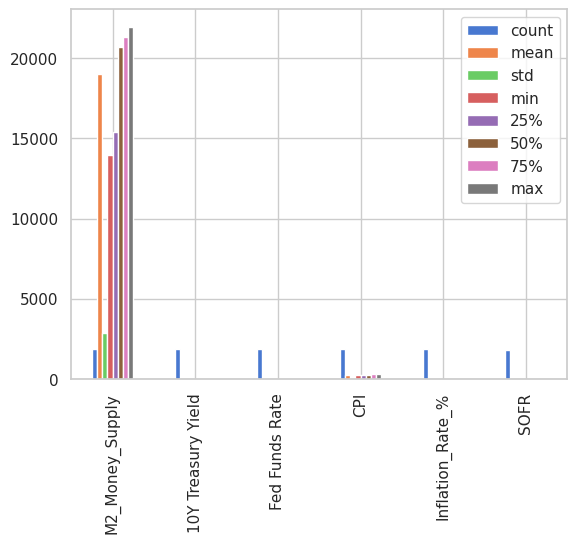

In [7]:
df.describe().T.plot(kind='bar')

In [8]:
print('\nStatistical Summary:')
print(df.describe())


Statistical Summary:
       M2_Money_Supply  10Y Treasury Yield  Fed Funds Rate          CPI  \
count      1890.000000         1890.000000     1890.000000  1890.000000   
mean      19039.955926            2.761429        2.496709   282.100917   
std        2860.222901            1.265754        2.001706    24.839167   
min       13993.900000            0.620000        0.050000   250.227000   
25%       15416.800000            1.620000        0.100000   257.155000   
50%       20720.600000            2.890000        2.200000   278.824000   
75%       21317.400000            3.980000        4.570000   307.374000   
max       21942.000000            4.800000        5.330000   320.580000   

       Inflation_Rate_%         SOFR  
count       1890.000000  1809.000000  
mean           3.586763     2.484588  
std            2.259300     2.012879  
min            0.198201     0.010000  
25%            2.000583     0.090000  
50%            2.814270     2.220000  
75%            4.946947     4

In [9]:
df.isnull().sum()

,0
Date,0
M2_Money_Supply,0
10Y Treasury Yield,0
Fed Funds Rate,0
CPI,0
Inflation_Rate_%,0
SOFR,81


In [10]:
df.duplicated().sum()

np.int64(0)

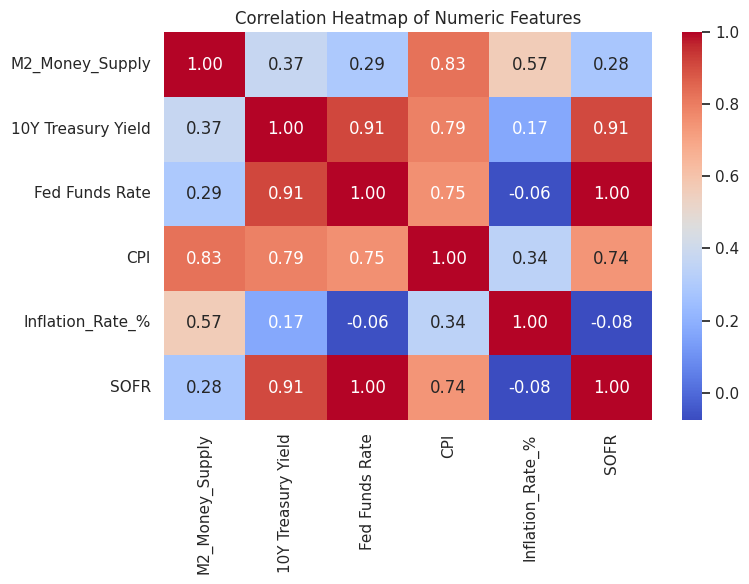

In [11]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

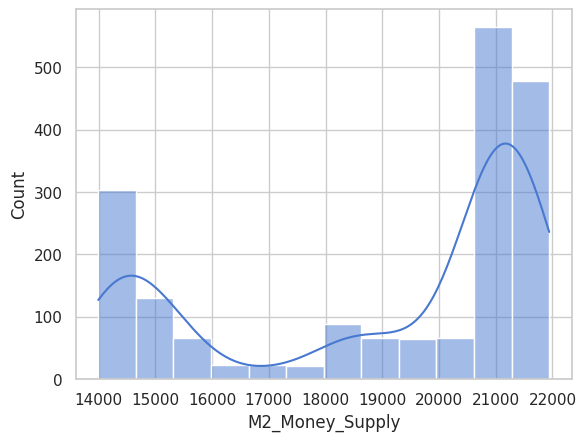

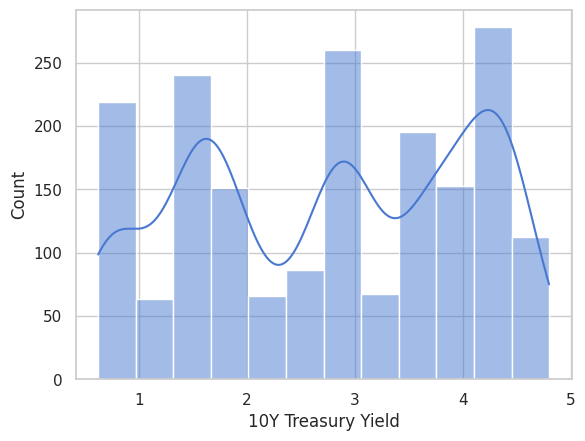

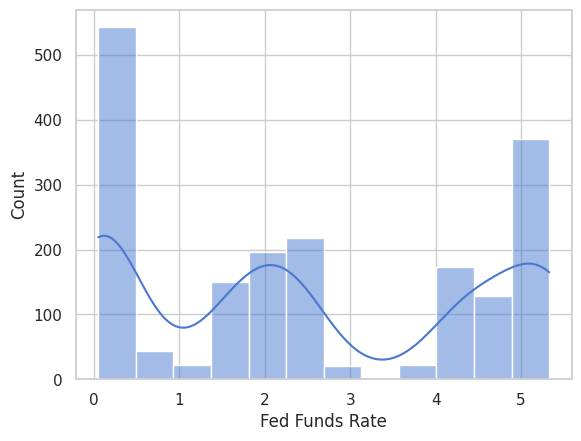

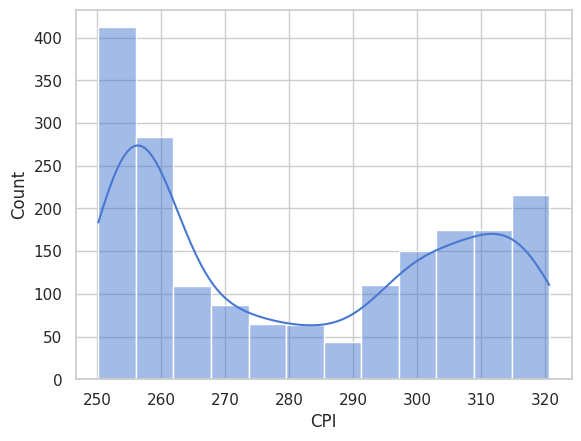

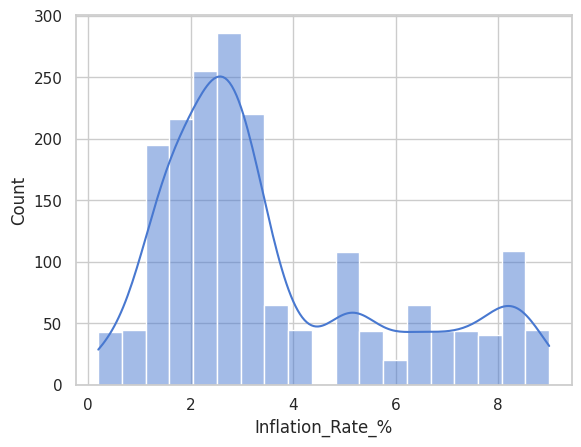

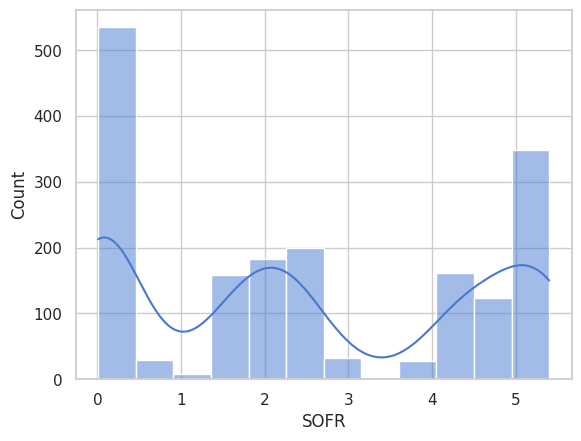

In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
  sns.histplot(x=col, data=df, kde=True)
  plt.show()

In [13]:
for col in df:
  if df[col].dtype == '0':
    sns.countplot(x=col, data=df)
    plt.show()